<a href="https://www.kaggle.com/code/esthernaisimoi/supermarket-data-analysis?scriptVersionId=220020325" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv


# SuperMarket Data Analysis
**These are the steps to follow to achieve correct analysis of the supermarket data:**
nb: the data used on this notebook can be found here : [supermarket-dataset](https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset/data)
1. importing necessary libraries that will be used for analysis eg pandas, numpy
2. Dataset Familiarization:Understand the Structure: Look at the columns, rows, and overall data.Check for any missing or inconsistent data.
3. Initial Data Exploration: here  iw ill perfrom visualizations,data exploration.
4. Identify insights:dentify Patterns,Highlight Anomalies.
5. Writing a technical report  explaining the isnghts.
    

# importing necessary libraries

In [2]:
# for mathematical calc
import pandas as pd  # For data manipulation and analysis
import numpy as np #For numerical operations(mathematical operatins)
#  visualizations
import matplotlib.pyplot as plt #For creating plots
import seaborn as sns #this is For advanced statistical plotting

# Dataset Familiarization

In [3]:
# Load the dataset into a Pandas DataFrame
data=pd.read_csv('/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv')

In [4]:
# Display the first few rows of the dataset to understand its structure
print(data.head()) # .head() method returns first 5 rows of the dataset.this our first row
#contains 13 columns

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [5]:
print(data.describe())
#describe() method in pandas  gives  statistical insights like count, mean, standard deviation, minimum, quartiles (25%, 50%, 75%), and the maximum value for each numeric column

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [6]:
data.info()
# display concise information eg, data types, number of rows and columns, column names, not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Identify insights

# Top 10 Selling Products by Sales

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64


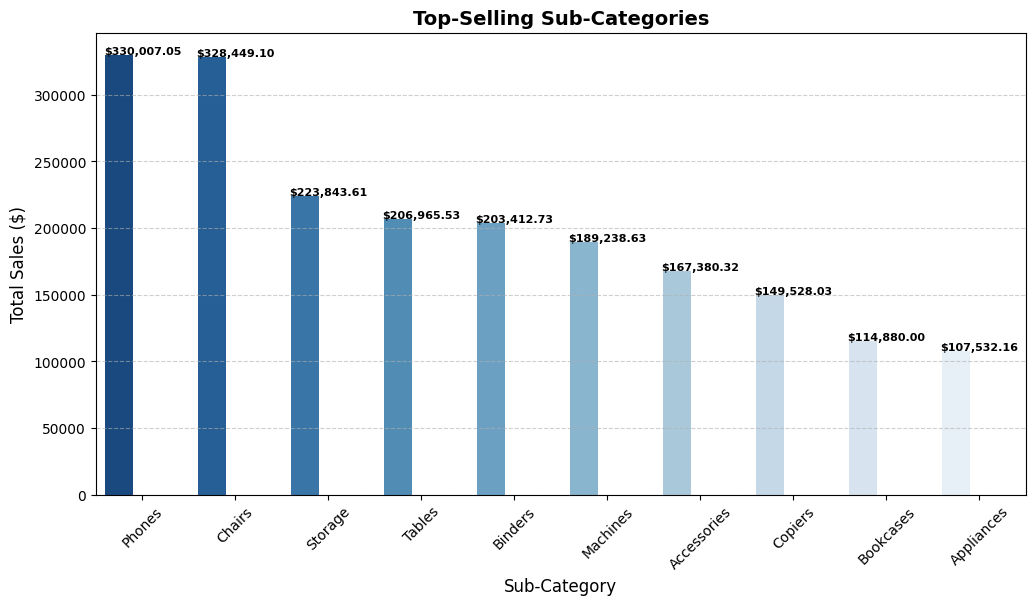

In [7]:
# Group by 'Sub-Category' and sum 'Sales'
top_selling_sub_categories = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# Display the top-selling sub-categories
print(top_selling_sub_categories.head(10))

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_selling_sub_categories.head(10).index, 
                 y=top_selling_sub_categories.head(10).values, 
                 palette='Blues_r')

# Add margin between bars by adjusting bar width
for bar in ax.patches:
    bar.set_width(0.3)  

# Add sales values on top of bars
for i, value in enumerate(top_selling_sub_categories.head(10).values):
    ax.text(i, value + 500, f"${value:,.2f}", ha='center', fontsize=8, fontweight='bold')

# Improve aesthetics
plt.title('Top-Selling Sub-Categories', fontsize=14, fontweight='bold')
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


# most_profitable_sub_categories

In [8]:
# Calculate total sales
total_sales = data['Sales'].sum()

# Print the total sales with formatting
print(f"Total Sales: ${total_sales:,.2f}")


Total Sales: $2,297,200.86


Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


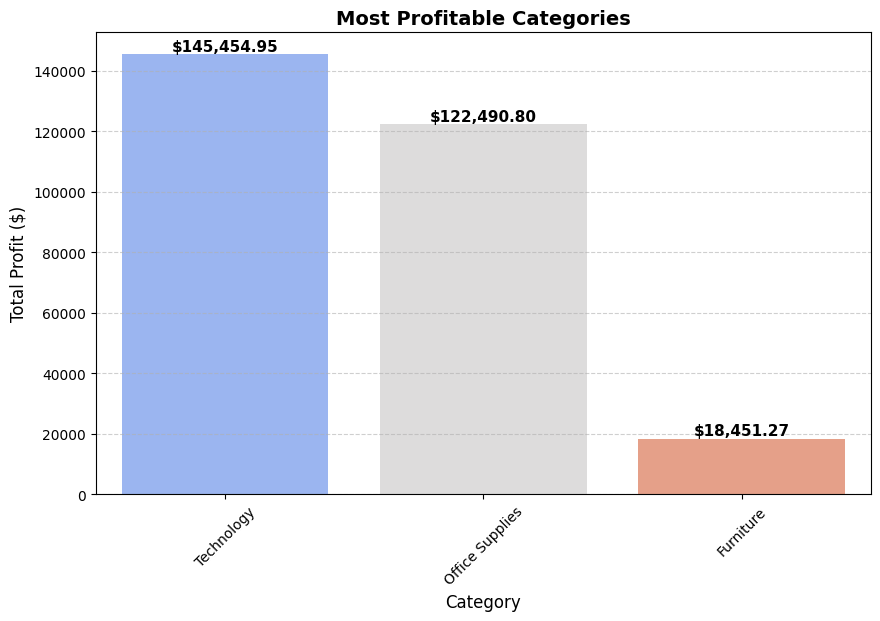

In [9]:
# Group by 'Category' and sum 'Profit'
profitable_categories = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)

# Display the top profitable categories
print(profitable_categories.head(10))

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=profitable_categories.index, y=profitable_categories.values, palette='coolwarm')

# Add profit values on bars
for i, value in enumerate(profitable_categories.values):
    plt.text(i, value + 1000, f"${value:,.2f}", ha='center', fontsize=11, fontweight='bold')


plt.title('Most Profitable Categories', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# most profitable sub-categories

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Name: Profit, dtype: float64


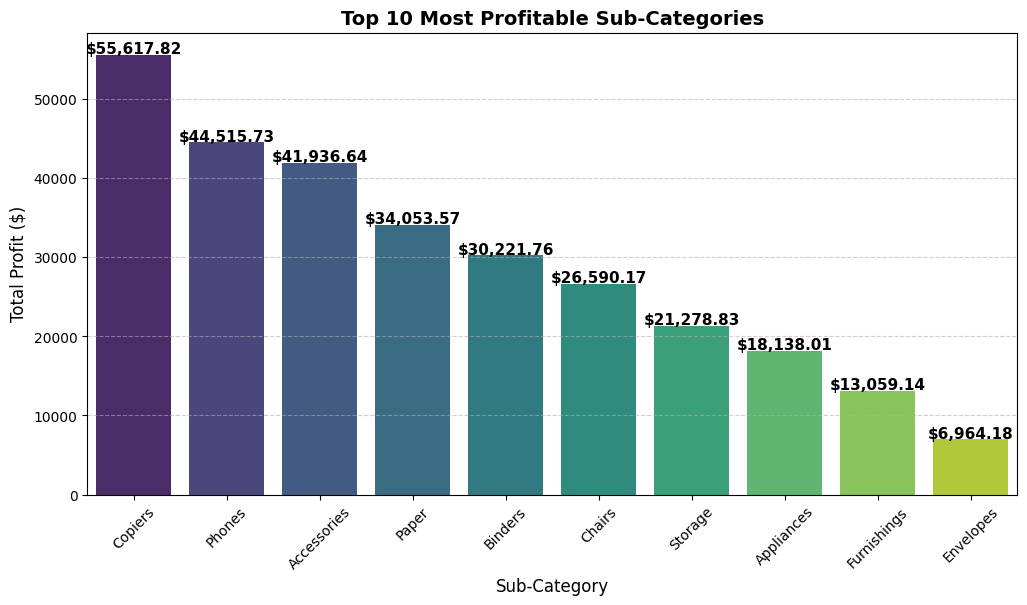

In [10]:
# Group dataset by 'Sub-Category' and sum 'Profit'
most_profitable_sub_categories = data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

# Display the top 10 most profitable sub-categories
print(most_profitable_sub_categories.head(10))

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x=most_profitable_sub_categories.head(10).index, 
            y=most_profitable_sub_categories.head(10).values, 
            palette='viridis')

# Add annotations on bars
for i, value in enumerate(most_profitable_sub_categories.head(10).values):
    plt.text(i, value + 200, f"${value:,.2f}", ha='center', fontsize=11, fontweight='bold')

# Improve visualization
plt.title('Top 10 Most Profitable Sub-Categories', fontsize=14, fontweight='bold')
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

 # Sales Performance by Ship Mode

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


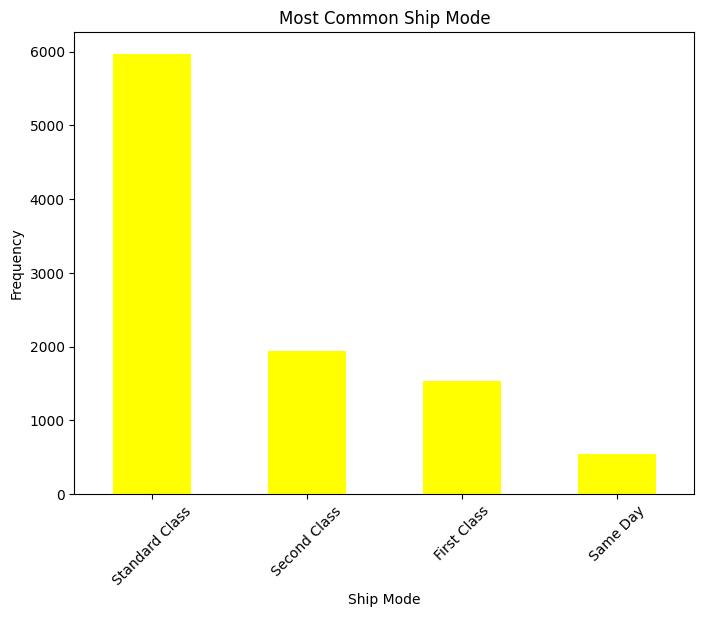

In [11]:
# Count the occurrences of each 'Ship Mode'
most_common_ship_mode = data['Ship Mode'].value_counts()

# Display the most common ship mode
print(most_common_ship_mode)

# visualize the distribution of ship modes with a bar chart
plt.figure(figsize=(8,6) )
most_common_ship_mode.plot(kind='bar', color='yellow')  # Bar chart for ship modes
plt.title('Most Common Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Average Profit by Segment

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64
Segment
Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: count, dtype: float64


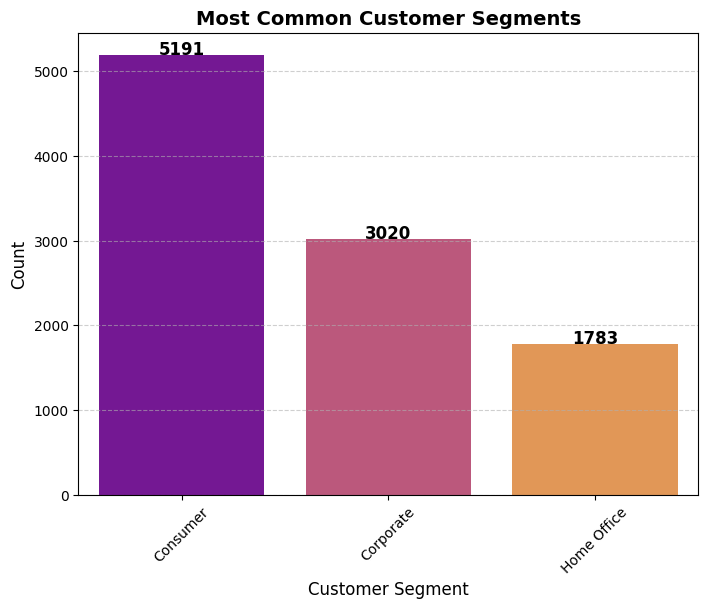

In [12]:
# Count occurrences of each 'Segment'
most_common_segment = data['Segment'].value_counts().sort_values(ascending=False)

# Calculate percentage
segment_percentage = (most_common_segment / most_common_segment.sum()) * 100

# Display segment counts and percentages
print(most_common_segment)
print(segment_percentage)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(x=most_common_segment.index, y=most_common_segment.values, palette='plasma')

# Add labels above bars
for i, value in enumerate(most_common_segment.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12, fontweight='bold')

# Improve visualization appearance
plt.title('Most Common Customer Segments', fontsize=14, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


 # Sales by State

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64


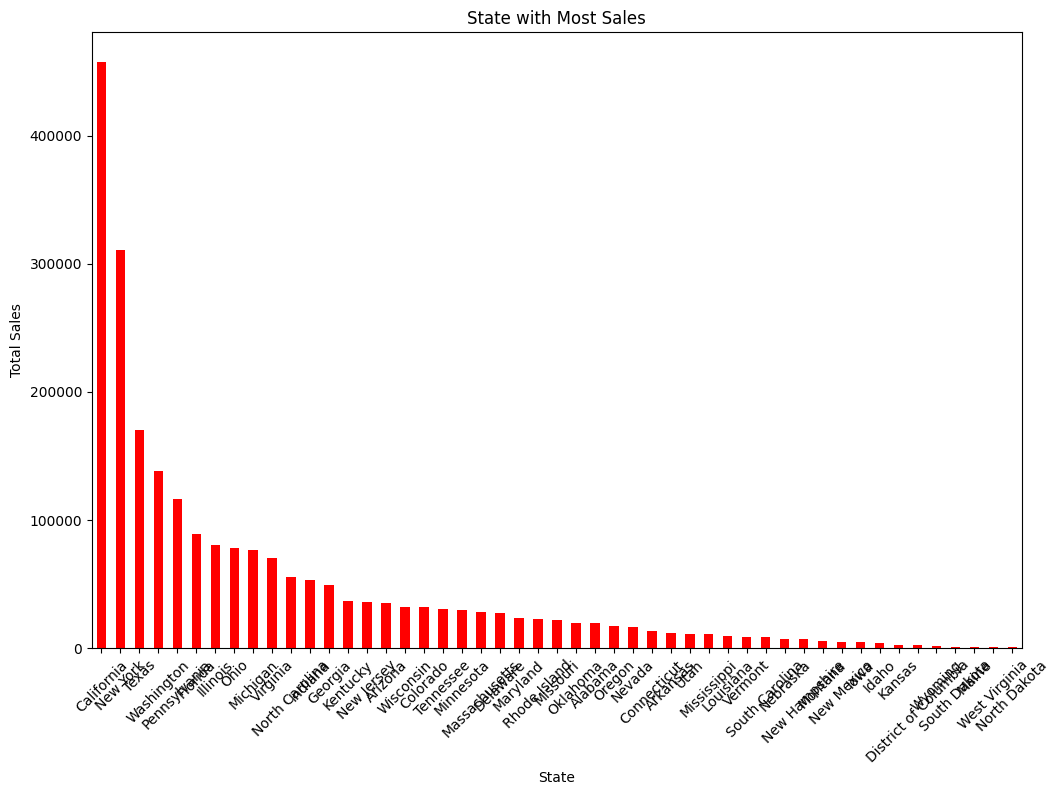

In [13]:
# Group the dataset by 'State' and sum the 'Sales' for each state
state_sales = data.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Display the state with the most sales
print(state_sales.head(10))  # Display the state with the highest sales

# visualize the sales distribution across states with a bar chart
plt.figure(figsize=(12,8))
state_sales.plot(kind='bar', color='red')  # Bar chart for state sales
plt.title('State with Most Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Profitability by State

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


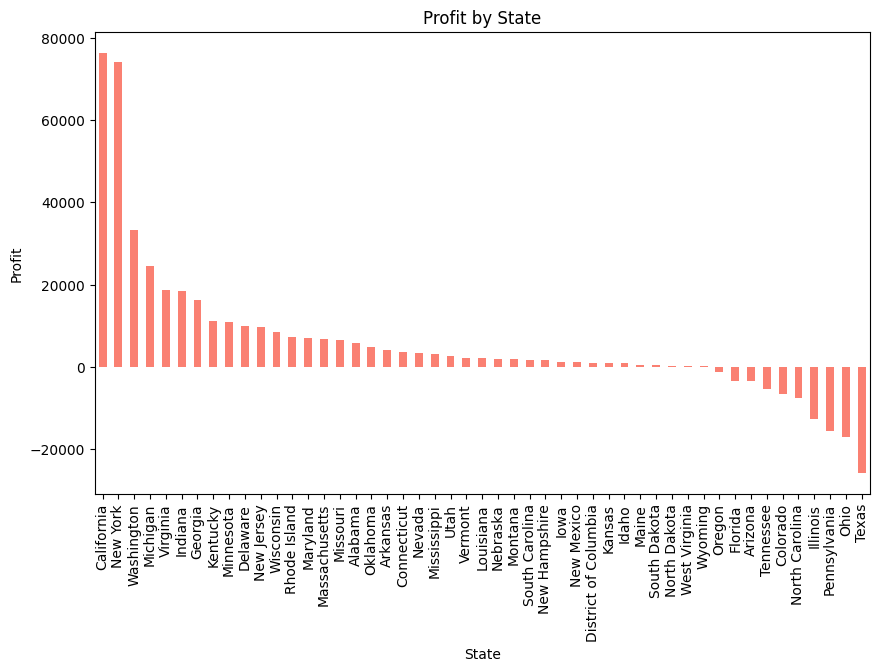

In [14]:

profit_by_state = data.groupby('State')['Profit'].sum().sort_values(ascending=False)
print(profit_by_state. head(10))
profit_by_state.plot(kind='bar', figsize=(10,6), color='salmon', title='Profit by State')
plt.ylabel('Profit')
plt.show()



 # Sales by City

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64


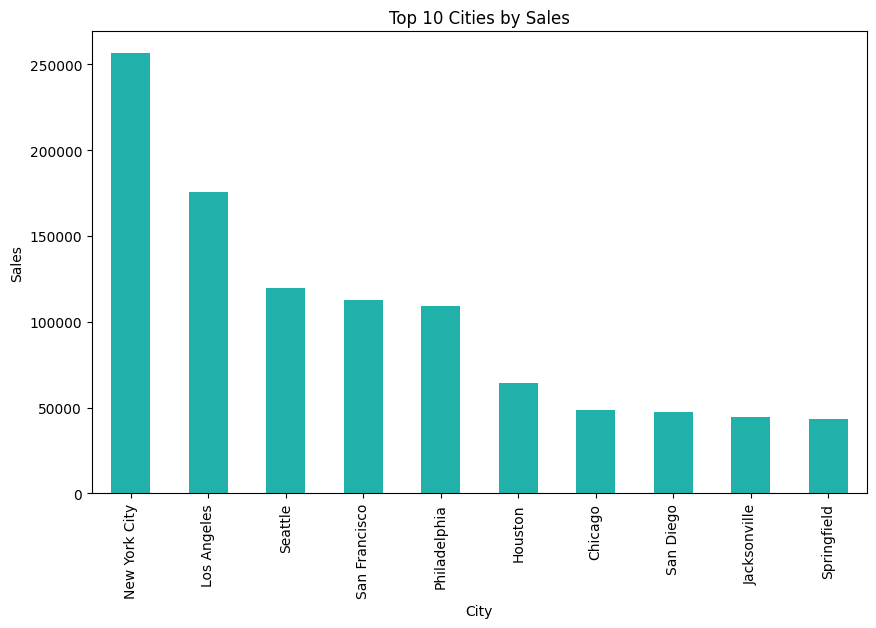

In [15]:

sales_by_city = data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
print(sales_by_city. head(10))
sales_by_city.plot(kind='bar', figsize=(10,6), color='lightseagreen', title='Top 10 Cities by Sales')
plt.ylabel('Sales')
plt.show()


# most bought product categories across states

                   State         Category       Sales
2                Alabama       Technology    8969.080
3                Arizona        Furniture   13525.291
7               Arkansas  Office Supplies    4565.330
11            California       Technology  159271.082
12              Colorado        Furniture   13243.037
16           Connecticut  Office Supplies    5418.340
20              Delaware       Technology   14562.220
23  District of Columbia       Technology    1379.920
26               Florida       Technology   46968.036
28               Georgia  Office Supplies   26715.810


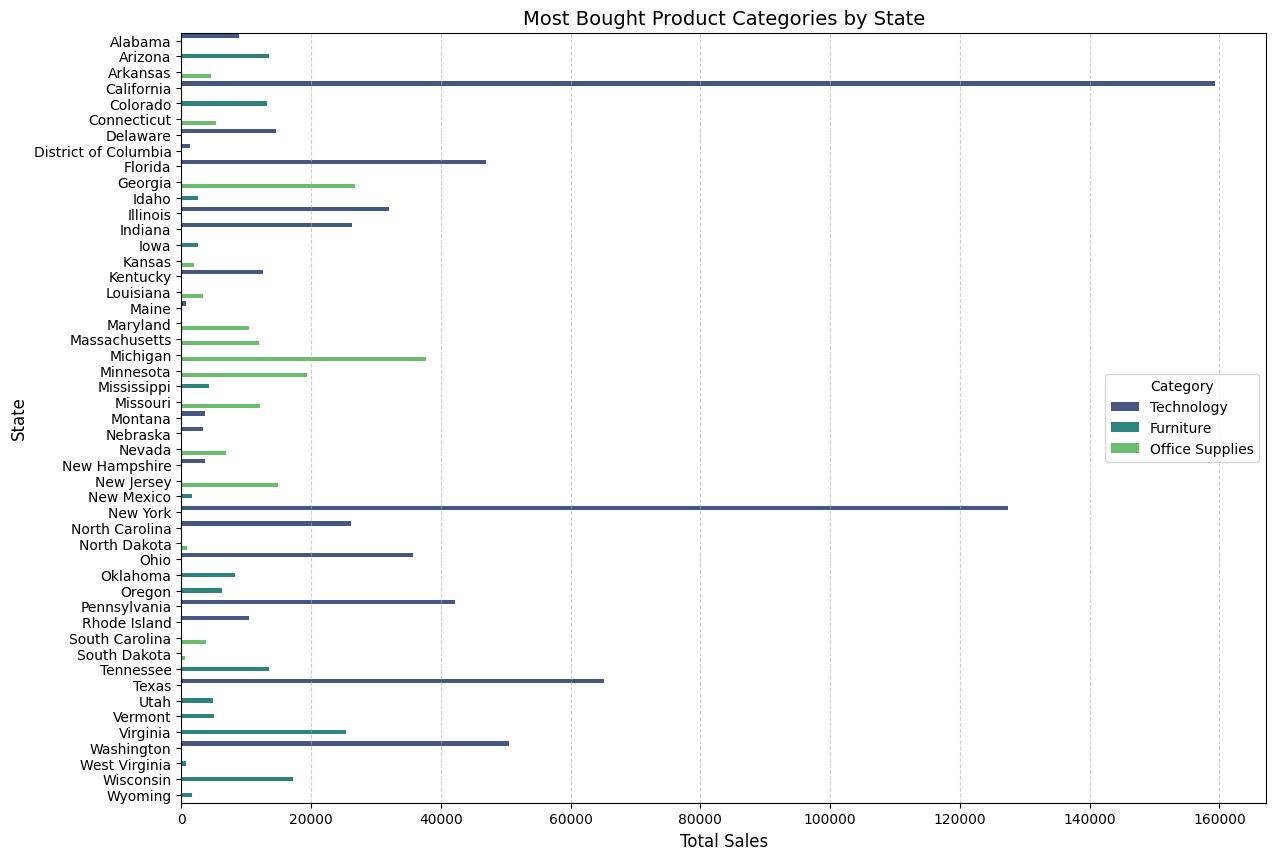

In [16]:
# Group the dataset by 'State' and 'Category', summing the 'Sales'
state_category_sales = data.groupby(['State', 'Category'])['Sales'].sum().reset_index()

# Find the category with the highest sales in each state
top_category_per_state = state_category_sales.loc[state_category_sales.groupby('State')['Sales'].idxmax()]

# Sort states alphabetically for better visualization
top_category_per_state = top_category_per_state.sort_values(by='State')

# Display the top category for each state
print(top_category_per_state.head(10))

# Visualization
plt.figure(figsize=(14,10))
sns.barplot(y='State', x='Sales', hue='Category', data=top_category_per_state, palette='viridis')
plt.title('Most Bought Product Categories by State', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.legend(title='Category')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Impact of Discounts on Sales and Profit

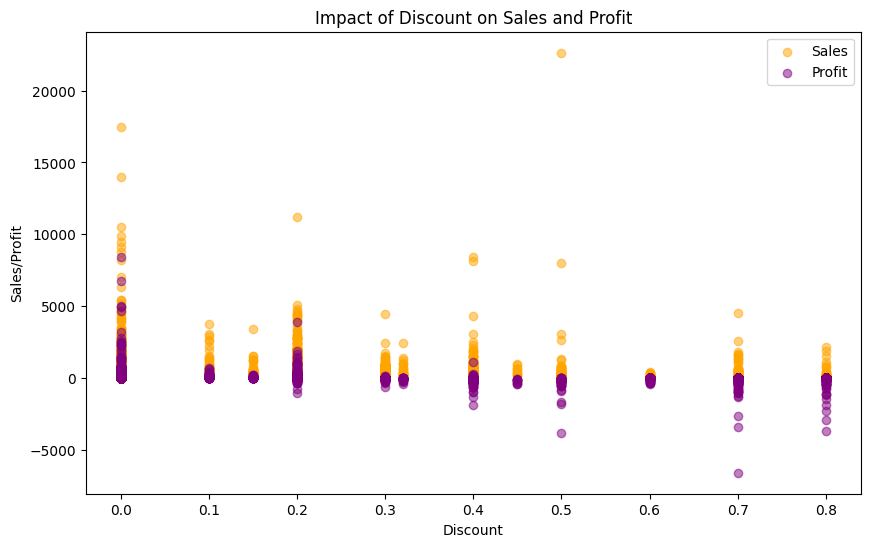

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(data['Discount'], data['Sales'], alpha=0.5, color='orange', label='Sales')
plt.scatter(data['Discount'], data['Profit'], alpha=0.5, color='purple', label='Profit')
plt.title('Impact of Discount on Sales and Profit')
plt.xlabel('Discount')
plt.ylabel('Sales/Profit')
plt.legend()
plt.show()


# Correlation Between Sales and Quantity Sold

**Check if there's a strong correlation between the quantity of items sold and the total sales value.

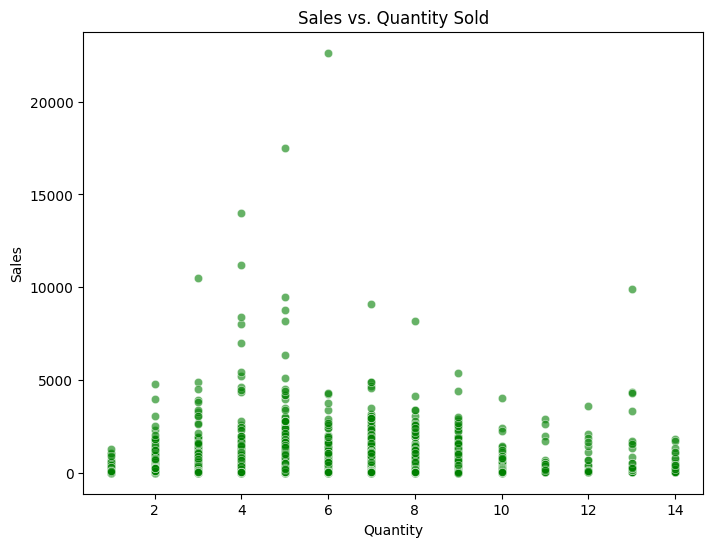

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Quantity', y='Sales', data=data, color='green', alpha=0.6)
plt.title('Sales vs. Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()


# Profitability of Different Categories and Sub-Categories

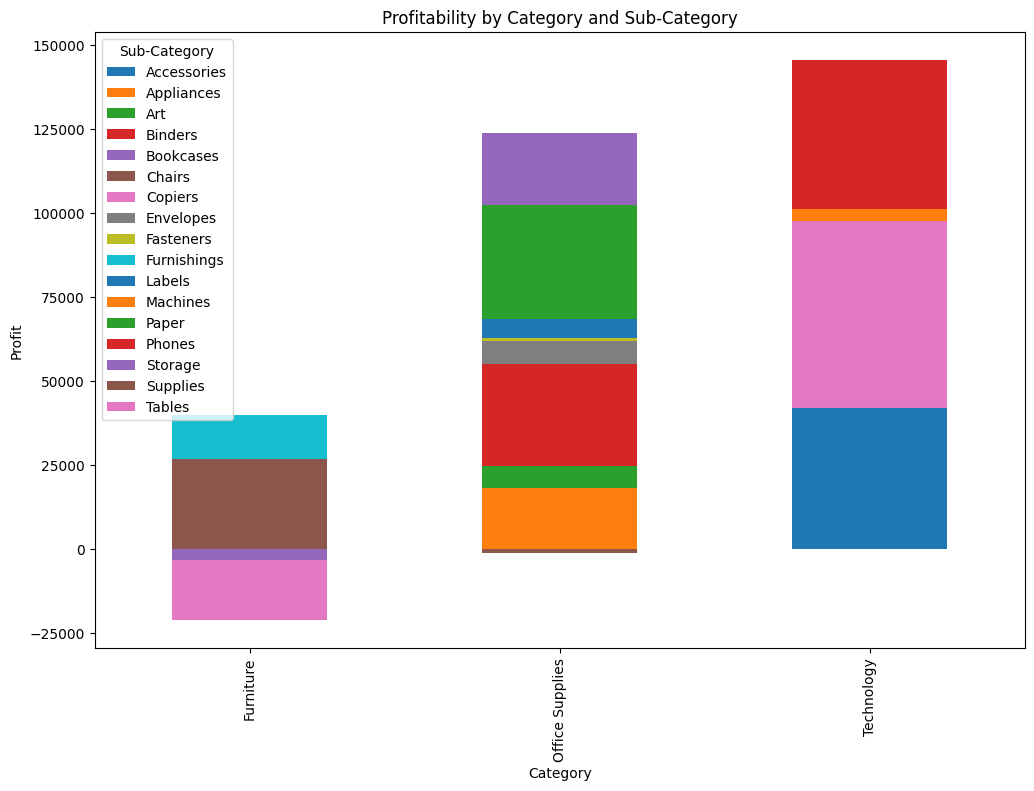

In [19]:

profitability_by_subcategory = data.groupby(['Category', 'Sub-Category'])['Profit'].sum().unstack()
profitability_by_subcategory.plot(kind='bar', stacked=True, figsize=(12,8), title='Profitability by Category and Sub-Category')
plt.ylabel('Profit')
plt.show()


 # Customer Segmentation by Region or Ship Mode

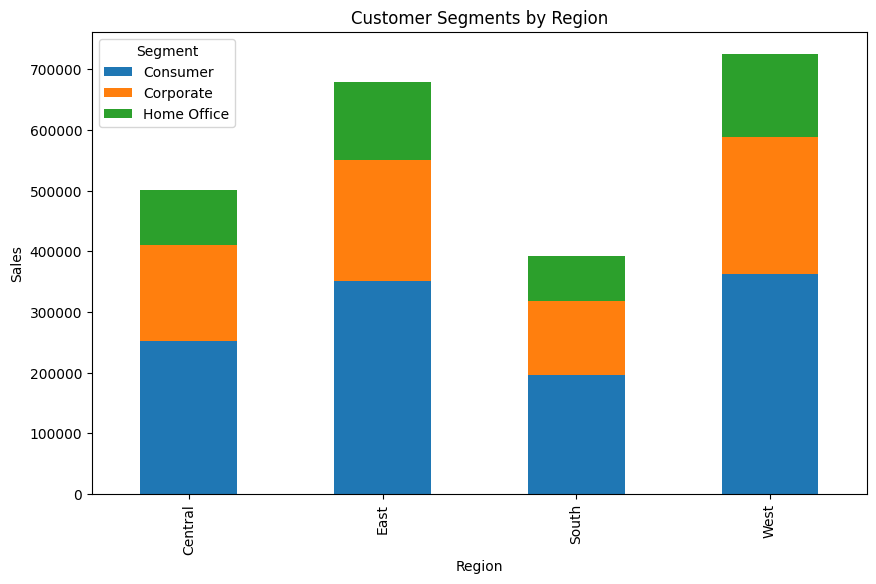

In [20]:
segment_by_region = data.groupby(['Region', 'Segment'])['Sales'].sum().unstack()
segment_by_region.plot(kind='bar', stacked=True, figsize=(10,6), title='Customer Segments by Region')
plt.ylabel('Sales')
plt.show()


# Sales & Profitability Report

# 1. Top-Selling vs. Most Profitable Sub-Categories

Top-Selling Sub-Categories:
The Phones, Chairs, and Storage sub-categories have the highest total sales, with Phones leading at $330,007.05. This indicates strong demand for these products, particularly in categories like **Technology and Furniture**.

# Most Profitable Sub-Categories:

The **Copiers sub-category leads in profitability**, with a total profit of **$55,617.82**. Other highly profitable sub-categories include Phones, Accessories, and Paper.
Insights:
While Phones and Chairs are the top-selling products, their high sales do not necessarily correlate with the highest profit margins. On the other hand, Copiers generate significant profit despite not being among the highest in sales.

**Recommendation:**

*Focus on maintaining sales for top-performing sub-categories like Phones while improving profitability by enhancing the margin for profitable sub-categories like Copiers.*
# 2. Sales and Profitability by State
**Top States by Sales:**

**California ($457,687.63), New York ($310,876.27), and Texas ($170,188.05)** are the leading states by total sales, contributing significantly to overall revenue.
**Top States by Profit:**

**California and New York ** also top the list for **profitability with $76,381.39 and $74,038.55,** respectively.
Other states such as Washington and Michigan show strong profit performance, indicating a healthy balance between sales and profitability.
Insights:

**California and New York dominate both in sales and profitability,** suggesting these states are **key markets with both high revenue and strong profit margins.**
Texas is a top seller but not a major contributor to profitability, indicating room for margin improvement in this state.

**Recommendation:**

*Focus on optimizing pricing and cost structures in states like Texas to increase profitability without sacrificing sales volume*.

# 3. Sales Performance by Ship Mode

Standard Class leads in total sales (5968 orders), followed by Second Class (1945 orders), First Class (1538 orders), and Same Day (543 orders).

Insights:

**Standard Class is the most commonly used shipping method**, contributing significantly to the overall sales volume. However, Same Day shipping, while having the lowest number of orders, could cater to high-value customers willing to pay a premium for faster delivery.

# Recommendation:

*Consider offering incentives for Same Day shipping to attract high-margin customers, and continue to optimize Standard Class for the majority of transactions.*

# 4. Most Bought Product Categories Across States

Certain states show preferences for specific categories:
**Technology is the dominant category in California, New York, and Texas**.
Office Supplies is more popular in states like Michigan, Missouri, and Illinois.
Insights:
*Technology appears to be the favored category in high-revenue states such as California and New York, while Office Supplies sees stronger demand in the Midwest and Eastern regions.*

# Recommendation:

*Tailor product offerings and marketing strategies by state to cater to the specific preferences of each region, ensuring high sales for in-demand categories.*
# 5. Impact of Discounts on Sales and Profit
The relationship between discounts and sales can be a key factor in determining overall profitability. Based on the data:
**High discounts may increase sales volume but decrease profit margins**.
Insights:
**A deeper analysis of discounting strategies may reveal whether certain discount ranges (e.g., 10-20%) lead to an increase in total sales without negatively impacting profit.**

# Recommendation:

*Implement a data-driven approach to discount strategies, focusing on optimizing sales without sacrificing profit margins. Conduct A/B testing to understand how various discount levels impact overall profitability.*

# Conclusion and Recommendations

1**. Focus on State-Specific Strategies:** *Optimize product offerings and pricing models for states where sales and profits are highest, like California and New York.*

**2. Balance Sales and Profit: ** *While some products, such as Phones and Chairs, generate high sales,** explore ways to improve the profitability of top-selling items by adjusting pricing or cost structures**.*

**3. Ship Mode Optimization:** *Leverage the high volume of Standard Class shipments and explore opportunities for Same Day shipping to cater to premium customers.*

**4. Tailor Discounts: ** ***Review discount policies** and use data insights to implement strategic discounts that do not overly erode profit margins.*

*This assesment was FROM [hng.tech](https://hng.tech/internship)  in partial fulfillment of the assesesment for [Data Analyst track](https://hng.tech/hire/data-analysts) please find the attached link below to signup for any track of your choice  [](https://hng.tech/internship)*
